<a href="https://colab.research.google.com/github/Harshavardhan123-cloud/ML/blob/master/SLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features + 1)  # Initialize weights, including bias
        self.errors = []

        for _ in range(self.epochs):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += int(update != 0)
            self.errors.append(error)

        return self

    def predict(self, X):
        # Compute the net input (weighted sum)
        net_input = np.dot(X, self.weights[1:]) + self.weights[0]
        # Apply the step function to make predictions
        return np.where(net_input >= 0, 1, -1)

    def test(self, X):
        # Make predictions for a test set
        predictions = []
        for xi in X:
            prediction = self.predict(xi)
            predictions.append(prediction)
        return np.array(predictions)

    def accuracy(self, y_pred, y_true):
        # Calculate accuracy given predicted and true labels
        correct = np.sum(y_pred == y_true)
        total = len(y_true)
        return correct / total



In [14]:
import pandas as pd
import numpy as np
df= pd.read_csv("games.csv")
df.tail(7)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
20051,uMzb0TPC,True,1.499812e+12,1.499813e+12,58,mate,black,10+10,samael88,1237,jamboger,1231,e4 e6 Nf3 d5 Bb5+ Bd7 c4 c6 Ba4 Qa5 b3 b5 cxb5...,C00,French Defense: Knight Variation,3
20052,EopEqqAa,True,1.499812e+12,1.499812e+12,37,resign,white,10+10,jamboger,1219,samael88,1250,c4 e6 d4 b6 Nc3 Bb7 Nf3 g6 h4 Bg7 Bg5 f6 Bf4 d...,A40,English Defense,4
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4
20057,N8G2JHGG,True,1.499643e+12,1.499644e+12,78,mate,black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3


In [15]:
df.iloc[142:150, 0:12]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating
142,R6dF4yRx,True,1.503090e+12,1.503090e+12,97,mate,white,15+15,failedocean,1227,sassou,1216
143,PLxCc87r,True,1.503090e+12,1.503090e+12,12,draw,draw,15+15,sassou,1215,lumipa,1219
144,p7a4FGwp,True,1.503090e+12,1.503090e+12,30,resign,white,15+15,fastandbulbous420,1227,sassou,1227
145,3udM9T6k,True,1.503090e+12,1.503090e+12,43,mate,white,10+0,minimouf,1550,sassou,1225
146,hkMNenrh,True,1.503080e+12,1.503080e+12,11,resign,white,15+15,goodolddaystr,1325,sassou,1234
147,jrmlULM0,True,1.503060e+12,1.503060e+12,72,mate,black,15+15,gonzalogp98,1212,sassou,1221
148,JbLparSt,True,1.503060e+12,1.503060e+12,156,mate,black,15+15,sassou,1226,vladimir_shindin,1478
149,mqZFkCf3,True,1.503060e+12,1.503060e+12,18,resign,black,25+0,sassou,1228,martin74,1626


In [16]:
y = df.iloc[0:20057, 6].values
y

array(['white', 'black', 'white', ..., 'black', 'white', 'white'],
      dtype=object)

In [17]:
y= np.where(y == 'black', -1,1)
print(y)

[ 1 -1  1 ... -1  1  1]


In [18]:
X=df.iloc[0:20057, [9,11]].values
X

array([[1500, 1191],
       [1322, 1261],
       [1496, 1500],
       ...,
       [1233, 1196],
       [1219, 1286],
       [1360, 1227]])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_test, y_test

(array([[1696, 1659],
        [1405, 1557],
        [1185, 1171],
        ...,
        [1545, 1199],
        [1182, 1176],
        [2287, 1956]]),
 array([-1,  1, -1, ...,  1,  1,  1]))

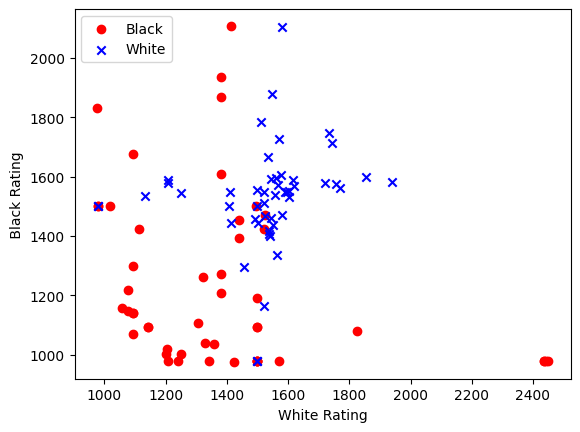

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X[:50,0], X[:50,1],color='red', marker='o', label='Black')
plt.scatter(X[50:100,0], X[50:100, 1], color="blue", marker='x', label='White')
plt.xlabel('White Rating')
plt.ylabel(' Black Rating ')
plt.legend(loc='upper left')
plt.show()


Final bias: 10.799999999999994
Final weight vector: [ 1495.4 -1601.2]


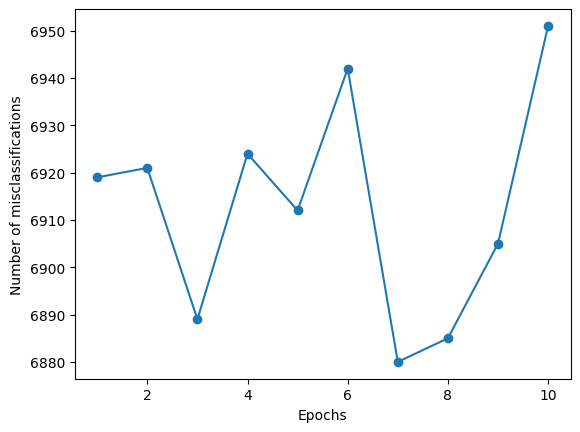

In [21]:

pn = Perceptron(0.1, 10)
pn.fit(X_train, y_train)
print(f"Final bias: {pn.weights[0]}")
print(f"Final weight vector: {pn.weights[1:]}")
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [22]:
y_predict1 = pn.test(X_test)
accuracy = pn.accuracy(y_predict1, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6071784646061814


In [23]:
from matplotlib import markers
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.2):
    markers_list = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers_list[idx], label=cl)



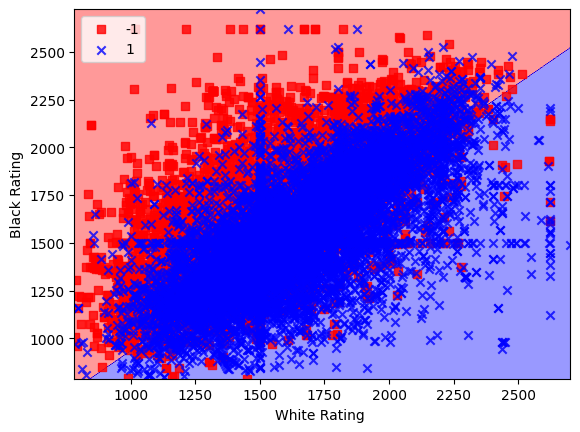

In [24]:
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('White Rating ')
plt.ylabel('Black Rating')
plt.legend(loc = 'upper left')
plt.show()